<a href="https://colab.research.google.com/github/Andre-Williams22/Data-Science-ML-Courses/blob/master/In_Class_Work/Homework_IntroToKeras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Keras

In this notebook, we'll explore the Keras and use it to create a classifier to predict hand written digits.

## Introduction and Background

### What is Keras? Why use it?

Keras is a high-level deep learning API that serves to build, train, evaluate, and as a toolbox to neural networks. This means that Keras is used to do deep learning by being a wrapper to more complex and low-level deep learning frameworks like TensorFlow, CNTK, and Theano. The same functions for Keras wrapped CNTK are the same for Keras wrapped Theano and TensorFlow. TensorFlow (TF), the current most popular deep learning library and open sourced by Google, has recently integrated it's framework with Keras, so now Keras comes in with TF. 

Well, that's all find and dandy, but why should we use Keras? What's wrong with using TF? And why is TF integrating Keras? What does this all mean? TF, as well as other deep learning libraries, can be a bit more complicated to use (for the exception of PyTorch, more on that in a second). As you may have already experienced, deep learning can be quite complex, having a *deep* understanding (pun intended) of everything that's going on is sometimes needed, making TF (pre-Keras integration) unfriendly. With the latest version of Keras, TF is now super easy to use. Since TF is the most common library, there are tons of add ons and pipelines for mobile and websites already made. Therefore, Keras/TF is ideal for the more common programmer.

Are there other options? The other up-and-coming library is PyTorch, created by Facebook. PyTorch is more common in research circles (whereas Keras/TF is more common in industry) however the interface at a high level tends to be the same. Arguably, transitioning from Keras to PyTorch should be simple.

So am I going to be using Keras or TF in this class? Both! In our case, they're the same thing. Again, Keras has been integrated by default to TF, Keras is a wrapper to TF. If you're going to be doing high level work (which will be 95% of the time), you're going to be calling and using Keras. If you're going into the nitty gritty low-level work of Neural Networks (i.e. creating your own custom loss function, activation function, or metrics), you're going to be using TF. If someone asks what deep learning framework you used in this class, TensorFlow! But do give a shoutout to Keras if you use `tf.keras` often.

So for the rest of this notebook, we'll be using Keras.

### Training Deep Learning Networks

Neural nets can take a while to train; you may have heard this prior in the mystery of deep learning. So can your computer train neural networks? It depends. If you're doing **deep** deep learning, using +30 layers or working with an enormous amount of data, training could take forever. One would need a GPU on their computer. More than often, we use some sort of cloud computing, why Colab would be ideal. For more intensive trainings (since Colab shuts down after +12 hours), usually a cloud provider like AWS (Amazon) or GCP (Google) would be used.

Keras/TF works with and without a GPU, but by default is set to without a GPU. In this notebook, we won't be working with intense computation, so a GPU isn't necessarily. However that doesn't mean that training can't take a while. If you're working on Colab, changing the computation setting from CPU to GPU may speed things up. Your decision on what to do.

If you have a GPU on your computer, there are guides towards setting up TF with a GPU with certain requirements. Slack me (Kevin Marroquin) for more details since this installation can get tricky.

## Running an example: MNIST

### Installing Tensorflow and Loading Imports

First, we're going to install Keras, in case you're using this on your local computer. However, this should work under Colab.

In [ ]:
#See installation details here: https://www.tensorflow.org/install/
!pip install tensorflow

In [1]:
#Importing Keras and other imports
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We're going to want reproducible results, so pre-defining random seeds is necessary.

In [2]:
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
set_seed(42)
#If the two lines above give you error, mute them and run the following:
# import tensorflow
# tensorflow.random.set_seed(42)

Normally one wouldn't want to have a pre-defined random seed (in fact you would want the exact opposite), but in our case, since we want to be able to produce reprodicible results for grading purposes, it's needed.

### Loading, Analyzing, and Preprocessing Data

For this example, we will be using the [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist). MNIST is a dataset of handwritten digits created to classify what type of digit, from zero to nine, is shown. MNIST is modified and, to some extent, normalized such that they're all the same size. Let's explore and see what kind of information MNIST have. If you've seen MNIST, this will probably be stuff you've seen before, so feel free to skip to the neural network part.

In [ ]:
#Loading datasets
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Seeing shapes of data
print("X_train:", X_train_full.shape)
print("y_train:", y_train_full.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


So we see that we have 60000 training datapoints and 10000 test. How does one of these datapoints look like?

In [ ]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test[0]

7

In [ ]:
X_train_full[0].shape

(28, 28)

So an image is represented as a 28x28 image in pixels and it. It's a picture in black and white, representing pixel intensity from 0 to 255, where a 255 representing black and 0 representing white. Let's plot this to see the data.

In [ ]:
#Looking at test data
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The expected value is: 4


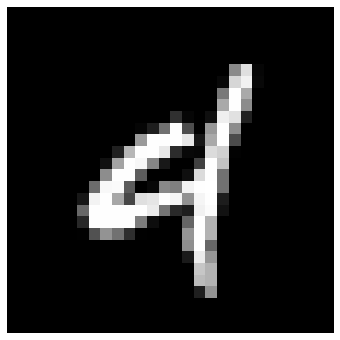

In [ ]:
#Rerun to get different numbers
def plotImage(image):
    """A 28x28 array that represents an image."""
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap="gray")
    plt.axis(False)
    plt.show()
sample_image = np.random.randint(0, len(X_train_full))
print("The expected value is:", y_train_full[sample_image])
plotImage(X_train_full[sample_image])

Before using this data, we must preprocess it to our likings. Something that should be done before plugging our data into our neural net is to normalize and shift it for better results ([see more details here](https://stackoverflow.com/questions/4674623/why-do-we-have-to-normalize-the-input-for-an-artificial-neural-network)). If you want some quick intuition about our activation functions, or a sigmoid function, most of it's "function" (the part that's interesting and not a flat line) is near `x` = 0 than at `x` = 255, `X_train_full`'s max point. Normalizing and shifting our data brings it to the action of the function (seriously, no pun intended on this one) where the model may perform better.

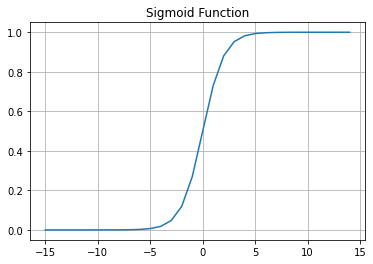

In [ ]:
#Example of Sigmoid function
def sigmoid(x):
    return 1/(np.exp(-x) + 1)
plt.plot(np.arange(-15, 15), sigmoid(np.arange(-15, 15)))
plt.title("Sigmoid Function")
plt.grid()
plt.show()

Let's convert this data to 0 and 1, where 1 is the max pixel intensity (255) and zero is still zero. Anything in between is the scaled value of the original data. In the process, we will create a validation pair (of X and y) to test our model after training and testing.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255
#No need to do y_test since it's not being fed into the data.
#Also, data is already shuffled, so no need to do so here

Lastly, inputting a 2D datapoint into a neural network is a bit of work to implement and architect. To avoid harder work, we will transform our data into a 1D array. We will do this in the next section.

### Creating A Simple Neural Network

Let's build a basic 2-layered neural network.

In [ ]:
#Including random seeds here again in case for reproducibility
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
set_seed(42)
#If the two lines above give you error, mute them and run the following:
# import tensorflow
# tensorflow.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

#Another similar way of writing the above code is:
# model = keras.model.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="sigmoid"),
#     keras.layers.Dense(100, activation="sigmoid"),
#     keras.layers.Dense(10, activation="softmax")
# ])
#Your choice in preference.

Going through the above code line by line:
- The first line creates the simplest model composed of a single stack of layers connected sequentially. Needed in most cases to initialize the model.
- The next layer flattens the data from 2D 28x28 to 1D 784. This layer is known as the input layer.
- The next two (Dense) layers are hidden layers with 300 and 100 neurons respectively. They're both using sigmoid for their activation functions and contain a weight matrix that changes during training.
- The last dense layer is the output layer. Choosing 10 neurons is a reflection of our output. We use a sigmoid function in order to calculate the probability.

This is, again, a 2-layered neural network. Let's print out the summary of the model.

In [ ]:
#Inputting the first hidden layer, should be in the shape of 0-1
weight = model.layers[1].get_weights()
weight[0]

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

We mentioned weights, that each layer contains it's own weights. As a reminder, a weight is needed to put emphasis on a feature in order to help a model model.

We'll now be compiling the model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", #Loss function
              optimizer="sgd", #Stochastic Gradient Descent
             metrics=["accuracy"])

Let's train and evaluate the model.

In [ ]:
y_valid.shape

(5000,)

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
y_train.shape

(55000,)

In [ ]:
#May take a while
history = model.fit(X_train, y_train, epochs=30, 
                  validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 2.1718 - accuracy: 0.3760 - val_loss: 1.9587 - val_accuracy: 0.5422
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.5916 - accuracy: 0.6502 - val_loss: 1.2082 - val_accuracy: 0.7258
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9993 - accuracy: 0.7686 - val_loss: 0.8152 - val_accuracy: 0.8084
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7290 - accuracy: 0.8228 - val_loss: 0.6272 - val_accuracy: 0.8452
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5895 - accuracy: 0.8512 - val_loss: 0.5246 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5084 - accuracy: 0.8688 - val_loss: 0.4614 - val_accuracy: 0.8772
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4572 - accuracy: 0.8785 - val_loss: 0.4177 - val_accuracy:

Plotting the accuracy and loss of our training and validation data.

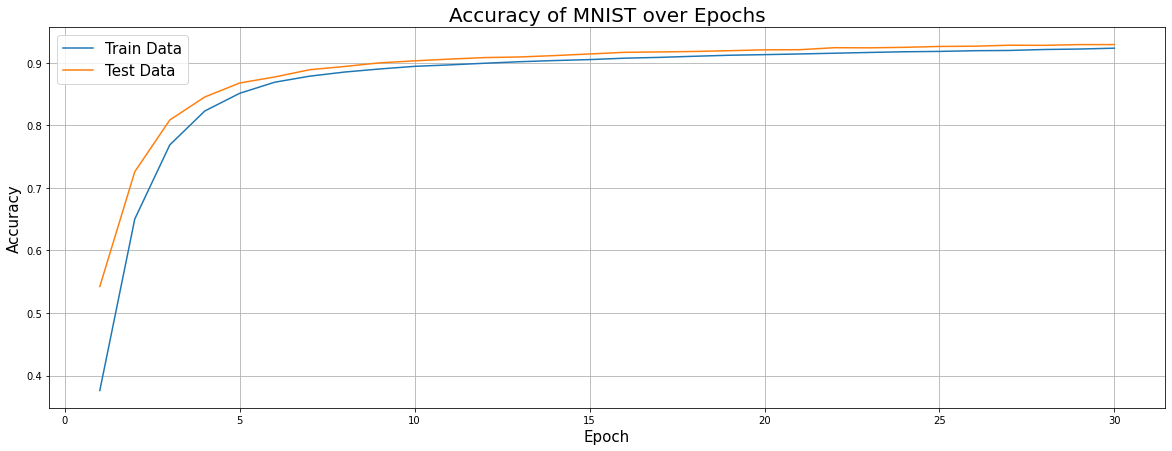

In [ ]:
#Plotting Accuracy
plt.figure(figsize = (20, 7))
plt.plot(np.arange(1, 31), history.history["accuracy"], label = "Train Data")
plt.plot(np.arange(1, 31), history.history["val_accuracy"], label = "Test Data")
plt.legend(fontsize = 15)
plt.xlabel("Epoch", size = 15)
plt.ylabel("Accuracy", size = 15)
plt.title("Accuracy of MNIST over Epochs", size = 20)
plt.grid()
plt.show()

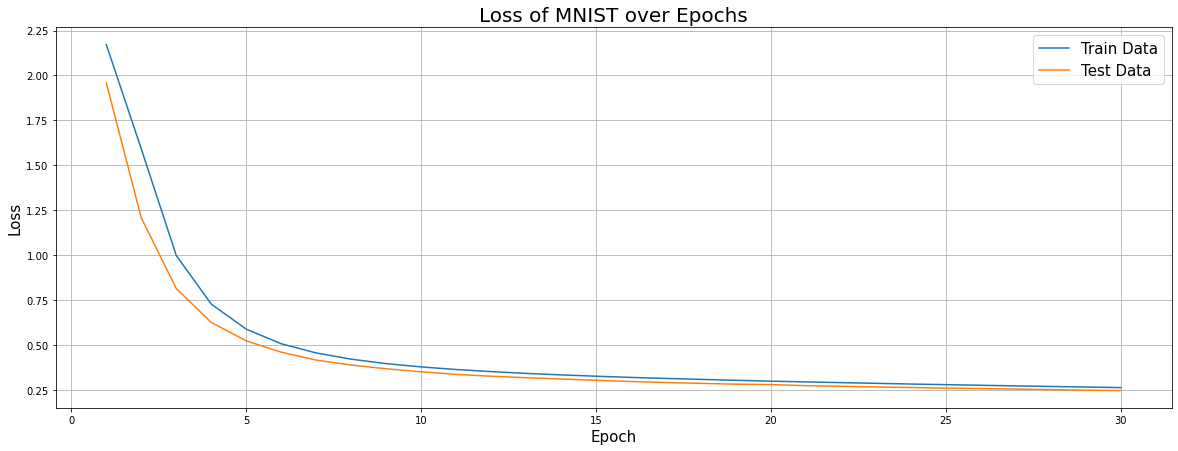

In [ ]:
#Plotting Loss
plt.figure(figsize = (20, 7))
plt.plot(np.arange(1, 31), history.history["loss"], label = "Train Data")
plt.plot(np.arange(1, 31), history.history["val_loss"], label = "Test Data")
plt.legend(fontsize = 15)
plt.xlabel("Epoch", size = 15)
plt.ylabel("Loss", size = 15)
plt.title("Loss of MNIST over Epochs", size = 20)
plt.grid()
plt.show()

Since our training and validation data seems to be closely tied, we can conclude there's hardly any overfitting. Creating a confusion matrix

In [ ]:
#Determining error from confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, np.argmax(model.predict(X_test), axis = -1))

array([[ 962,    0,    3,    1,    0,    5,    6,    2,    1,    0],
       [   0, 1109,    2,    2,    0,    2,    4,    2,   14,    0],
       [  13,    6,  932,    8,   12,    3,   14,   12,   28,    4],
       [   2,    1,   22,  918,    0,   30,    1,   16,   16,    4],
       [   1,    2,    6,    0,  922,    0,   12,    2,    6,   31],
       [  10,    2,    4,   41,    6,  780,   12,    7,   22,    8],
       [  14,    3,    6,    1,   10,   16,  904,    2,    2,    0],
       [   4,    9,   22,    6,    6,    0,    0,  962,    1,   18],
       [   7,    7,    8,   24,    9,   33,   11,   12,  859,    4],
       [  13,    8,    1,   10,   33,    6,    0,   24,    6,  908]])

A nicer plot

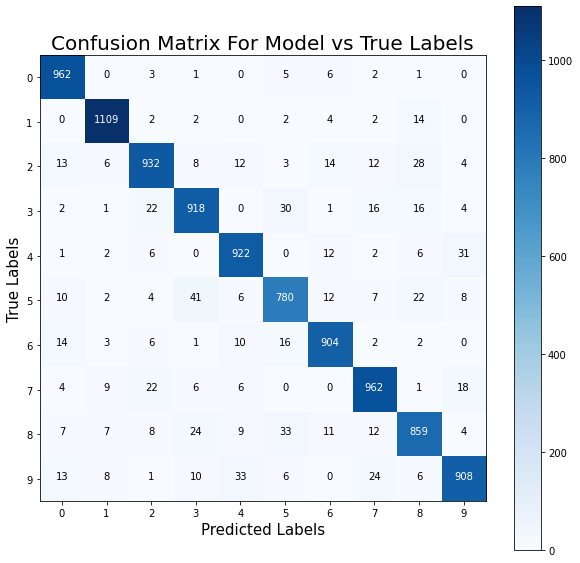

In [ ]:
#Creating a plotting function for a confusion matrix
import itertools
cm = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis = -1))
plt.figure(figsize=(10, 10))
plt.imshow(cm, plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix For Model vs True Labels", size = 20)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")
plt.xlabel("Predicted Labels", size = 15)
plt.xticks(np.arange(0, 10))
plt.ylabel("True Labels", size = 15)
plt.yticks(np.arange(0, 10))
plt.show()

A confusion matrix is useful in looking at what values are predicting expected values. For example, the graph above shows that our model predicted nine +30 times when in reality it was four. This checks out, as fours and nines can occasionally look alike.

A note on reading a confusion matrix: The heavy blue diagonal represents correctly predicted labels. Everything outside the diagonal represents predicted labels that were wrong to guess a certain true label. Match the x-axis and y-axis to determine what values were guessed correctly/incorrectly. What's the highest incorrectly predicted number? Does it make sense why a model would confuse it (i.e. can the incorrectly predicted value and true label be similarly drawn)? Would a human confuse this incorrectly predicted number?

Finally, we see how our model performs using our test data.

In [ ]:
score = model.evaluate(X_test, y_test)
print("loss:", score[0], "acc:", score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.2563 - accuracy: 0.9256
loss: 0.25626498460769653 acc: 0.925599992275238


## Question 1: Your Turn, Get Better Results Than Me On MNIST

Can you get better accuracy than me? I know there's specific hyperparameters where accuracy can get +99%. Here's a list of some hyperparameters you can tune:

#### Hyperparameters:
- Number of layers
- Number of neurons in layers
- Activation functions
- Learning rate
- Loss
- Optimizer
- Metrics
- Epochs

Hyperparameter testing shows how expensive testing every single option can be. I recommend changing the learning rate, number of layers, number of neurons, and activation function, but feel free to change or add whatever you'd like.

#### Cheatsheet on how to do the above:
- **Adding a layer**: `model.add(keras.layers.Dense())`
- **Number of neurons in layers**: Input/change number inside `keras.layers.Dense()`
- **Changing Activation functions**: In a dense layer, write `Dense(activation="InsertFunctionNameHere")`. Examples of other functions can be found [here](https://keras.io/api/layers/activations/)
- **Changing learning rate**: Involves importing `backend`. Instructions/a quick example can be found [here](https://stackoverflow.com/a/62113860).
- **Changing Loss functions**: Same as changing Activation functions, but the loss is defined/changed when you call `model.compile(loss="InsertFunctionNameHere")`. Be mindful to see what losses are appropriate for what models (you don't want a continuous loss on a binary model; continous and discrete don't mix!). This shouldn't be tweaked too much, but I want to give you all full control. List of loss functions [here](https://keras.io/api/losses/).
- **Changing Optimizer**: This can speed up or give you better results:  `model.compile(optimizer="InsertOptimizerNameHere")`. List of Optimizers are [here](https://keras.io/api/optimizers/). Try Adam or RMSprop since they seem to be popular.
- **Changing or Adding Metrics**: Similar to changing optimizer and loss: `model.compile(metrics=["InsertListOfMetricsHere"])`. You can run multiple metrics at the same time and it shouldn't decrease your performance. The same advise goes here as to changing loss functions: be aware what metrics are telling you what before you go on and change them. Here's a [list](https://keras.io/api/metrics/) of metrics.
- **Changing Number of Epochs**: Changed when running `model.fit(epochs="InsertNumericValueHere")`. Strategies of running a certain number of epochs can be found [here](https://www.codespeedy.com/how-to-choose-number-of-epochs-to-train-a-neural-network-in-keras/).

Another way to improve results is to do image processing on the data. Since this notebook is to practice Keras I won't give any hints. But I do want to point it out since in real life, modifying data is universal to improving and speeding any model. You're more likely to do this first as a strategy than tweak for model parameters. For now, however, we do this for practice.

In [ ]:
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
set_seed(42)
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from keras.utils import np_utils 
from tensorflow.keras.datasets import mnist 
#If the two lines above give you error, mute them and run the following:
# import tensorflow
# tensorflow.random.set_seed(42)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
#Seeing shapes of data
print("X_train:", X_train_full.shape)
print("y_train:", y_train_full.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [ ]:
X_train = X_train.reshape(60000, 28*28)
X_train.shape

(60000, 784)

In [ ]:
# lets look at first image
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
X_test = X_test.reshape(10000, 28*28)
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Normalize the data 

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# X_train[0]

In [ ]:
X_train /= 255 
X_test /= 255

In [ ]:
X_train.max()

1.0

In [ ]:
X_train.min()

0.0

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test = np_utils.to_categorical(y_test)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Create Model

In [ ]:
# how many layers are added to the hidden layer 

(784 + 10) / 2 

397.0

In [ ]:
#TODO: Create model, compile, and train (and I highly recommend that you
#plot/make a confusion matrix, as it's super helpful in gaining context to 
#how your model is acting and where is error largest.)
###YOUR CODE BELOW###

# input =>  hidden => output 
# 784 => 397 => 397 => 10 
network = Sequential()
network.add(Dense(input_shape = (784,), units = 397, activation = 'relu'))
network.add(Dense(units=397, activation='relu'))
network.add(Dense(units = 10, activation='softmax'))

In [ ]:
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# check training data scores
history = network.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2310 - accuracy: 0.9325
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0824 - accuracy: 0.9751
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0524 - accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0377 - accuracy: 0.9880
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0232 - accuracy: 0.9921
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0201 - accuracy: 0.9933
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0119 - accuracy: 0.9961
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0158 - accuracy: 0.9946

## Neural Network Evaluation

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

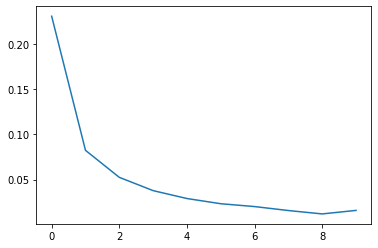

In [ ]:
# we can see the loss started high and began to decrease
plt.plot(history.history['loss'])

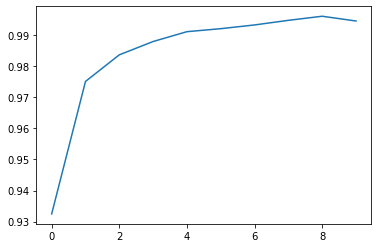

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
# check model on test data
accuracy_test = network.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0834 - accuracy: 0.9797


In [ ]:
predictions = network.predict(X_test)

In [ ]:
predictions[0]

array([3.2820109e-09, 5.8784153e-08, 2.3020160e-08, 1.7232125e-07,
       5.7740587e-12, 3.0227576e-09, 5.1360706e-13, 9.9999571e-01,
       6.1342410e-11, 4.0130917e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

Text(0.5, 1.0, 'class')

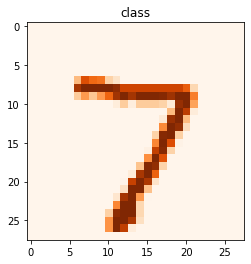

In [ ]:
plt.imshow(X_test[0].reshape(28, 28), cmap='Oranges');
plt.title('class')

In [ ]:
###EXTRA CELL IF NEEDED###
#Feel free to create as many as needed.

In [ ]:
#Tester cell to see if your model is beating my results
#Run this for your credit
# your_score = your_model.evaluate(X_test, y_test)
# print("loss:", your_score[0], "acc:", your_score[1])
# assert your_score[1] > score[1]

## Question 2: Create a Fashion Classifier

MNIST is known as being "too easy" for machine learning models. Classical ML models (e.g. SVMs, Random Forests) are able to score +99% accuracy with less training. Another similar dataset, named *Fashion MNIST*, is gaining popularity as it's a much harder classification problem while quite similar to MNIST.

In this section, you will be creating a classifier for this fashion dataset. This dataset is very similar to MNIST in structure, so there won't be much hand holding in this section. In theory, you can copy/paste everything in the previous section and change very little. I recommend typing everything out (particularly in the Keras section) as it gets you familiar with actually learning Keras.

A note about Fashion MNIST: the dataset is heavily pre-processed. The data won't look pretty to us (it's pixalated and colorless), but to a computer it's simple enough.

In [3]:
from numpy.random import seed
seed(42)
from tensorflow.random import set_seed
import tensorflow 
set_seed(42)
#If the two lines above give you error, mute them and run the following:
# import tensorflow
# tensorflow.random.set_seed(42)

In [4]:
#Load Data
#HINT: You can load Fashion MNIST from Keras the same way you do with MNIST.
#You may have to do some digging on the internet in order to do this.
#This exercise is to get you familiar with the Keras API
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.datasets import fashion_mnist

#Your labels in y are numbers from 0-9. Each of those numbers corresponds to 
#an index to a label in the labels variable. i.e. 8 = "Bag", 4 = "Coat", etc.
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
         "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
#Analyze Data (Optional, up to you on what to discover). Recommend you take 
#plotImage to see how the data has been pre-processed initially. (In general, 
#it's always a good idea to know how your data looks like.) You may have to 
#modify plotImage.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The expected value is: 0


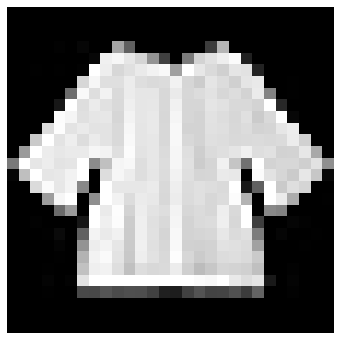

In [10]:
#Pre-Process Data 
#Hint: Very similar to MNIST
#Rerun to get different numbers
def plotImage(image):
    """A 28x28 array that represents an image."""
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap="gray")
    plt.axis(False)
    plt.show()
sample_image = np.random.randint(0, len(X_train))
print("The expected value is:", y_train[sample_image])
plotImage(X_train[sample_image])

In [11]:
X_train.shape # 28 pixels wide and 28 pixels high 

(60000, 28, 28)

In [12]:
X_train = X_train.reshape(60000, 28 * 28) # reshape to make it one image 
X_train.shape

(60000, 784)

In [13]:
X_train[0] # grab first image. 0 = black 

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [14]:
X_test = X_test.reshape(10000, 28 * 28)
X_test.shape

(10000, 784)

In [15]:
X_train = X_train.astype('float32') # convert to floats 
X_test = X_test.astype('float32')

In [16]:
# divide values 
X_train /= 255 
X_test /= 255 

In [17]:
X_train.max()

1.0

In [18]:
X_test.min()

0.0

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Train Neural Network 

In [65]:
# we have 784 inputs + 10 classes of fashion = num of neurons we need in our hidden layer
(784 + 10) / 2

397.0

In [20]:
from tensorflow.python.keras.layers import LeakyReLU

## A Regular ANN 

In [21]:
np.random.seed(42)
network = Sequential()
network.add(Dense(input_shape = (784,),units = 397, activation ='relu'))
network.add(Dense(units=397, activation='relu'))
network.add(LeakyReLU(alpha=0.1))
network.add(Dense(units=10, activation='softmax'))

network.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) # sparse_
history = network.fit(X_train, y_train, batch_size=150, epochs=16)

Epoch 1/16
400/400 [==============================] - 5s 11ms/step - loss: 0.4910 - accuracy: 0.8252
Epoch 2/16
400/400 [==============================] - 5s 12ms/step - loss: 0.3561 - accuracy: 0.8700
Epoch 3/16
400/400 [==============================] - 5s 12ms/step - loss: 0.3160 - accuracy: 0.8830
Epoch 4/16
400/400 [==============================] - 5s 12ms/step - loss: 0.2961 - accuracy: 0.8899
Epoch 5/16
400/400 [==============================] - 5s 11ms/step - loss: 0.2764 - accuracy: 0.8965
Epoch 6/16
400/400 [==============================] - 5s 11ms/step - loss: 0.2616 - accuracy: 0.9018
Epoch 7/16
400/400 [==============================] - 5s 12ms/step - loss: 0.2471 - accuracy: 0.9067
Epoch 8/16
400/400 [==============================] - 5s 12ms/step - loss: 0.2377 - accuracy: 0.9096
Epoch 9/16
400/400 [==============================] - 5s 12ms/step - loss: 0.2247 - accuracy: 0.9152
Epoch 10/16
400/400 [==============================] - 5s 12ms/step - loss: 0.2166 - accura

In [22]:
accuracy_test = network.evaluate(X_test, y_test)
np.random.seed(42)

313/313 [==============================] - 1s 3ms/step - loss: 0.3454 - accuracy: 0.8921


## Apply A 2D CNN For Higher Accuracy 

In [38]:
# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [24]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [25]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [26]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  
	return model

In [27]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)
    
    return scores, histories

In [28]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
  for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [29]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [39]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	# summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

## Evaluate the CNN Model's Performance

> 90.225
> 91.517
> 90.975
> 91.133
> 90.900
Accuracy: mean=90.950 std=0.420, n=5


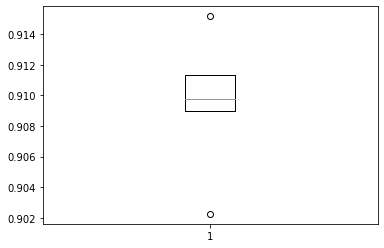

In [40]:
# entry point, run the test harness
run_test_harness()

## Evaluate Neural Network 

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

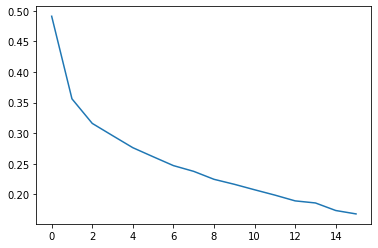

In [44]:
plt.plot(history.history['loss'])

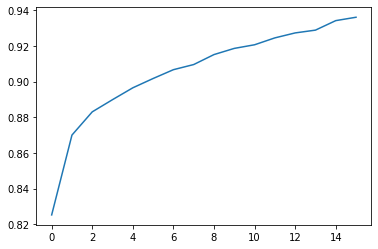

In [45]:
plt.plot(history.history['accuracy'])

In [286]:
accuracy_test = network.evaluate(X_test, y_test)
np.random.seed(42)

313/313 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8965


In [275]:
predictions = network.predict(X_test)

In [276]:
predictions[0]

array([4.7433169e-09, 2.0167459e-09, 4.4442117e-09, 8.5954811e-12,
       1.3521365e-09, 3.5419123e-06, 1.0536396e-09, 3.7104288e-05,
       1.4070881e-10, 9.9995935e-01], dtype=float32)

In [277]:
np.argmax(predictions[0])

9

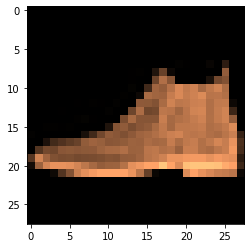

In [278]:
plt.imshow(X_test[0].reshape(28, 28), cmap='copper');

In [ ]:
#Tester cell to see if your model is beating my results
# score = model.evaluate(X_test, y_test)
# print("loss:", score[0], "acc:", score[1])
# assert 0.89 < score[1], "Accuracy not high enough"

Try to get above 89% accuracy for both train and test using various hyperparameters.

What label is the most mislabeled (contains the most error) in this model? Plot a confusion matrix showing this. Does it make sense? Plot several datapoints using `plotImage` to find out.

In [ ]:
#Confusion Matrix
# import itertools
# cm = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis = -1))
# plt.figure(figsize=(10, 10))
# plt.imshow(cm, plt.cm.Blues)
# plt.colorbar()
# plt.title("Confusion Matrix For Model vs True Labels", size = 20)
# fmt = 'd'
# thresh = cm.max() / 2.
# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, format(cm[i, j], fmt),
#               horizontalalignment="center",
#               color="white" if cm[i, j] > thresh else "black")
# plt.xlabel("Predicted Labels", size = 15)
# plt.xticks(np.arange(0, 10), labels=labels, rotation = 45)
# plt.ylabel("True Labels", size = 15)
# plt.yticks(np.arange(0, 10), labels=labels)
# plt.show()

## Question 3: Bonus - EMNIST

EMNIST is an expansion of MNIST on [Kaggle](https://www.kaggle.com/crawford/emnist). If you feel you still need some practice, feel free to check it out. Others have made notebooks on Kaggle with other fancy techniques. Explore if you have time!

If you're interested in similar preprocessed datasets, check out this website: https://analyticsindiamag.com/fashion-and-medical-mnist/. They link to medical datasets and a sign language-like MNIST.

In [41]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [42]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


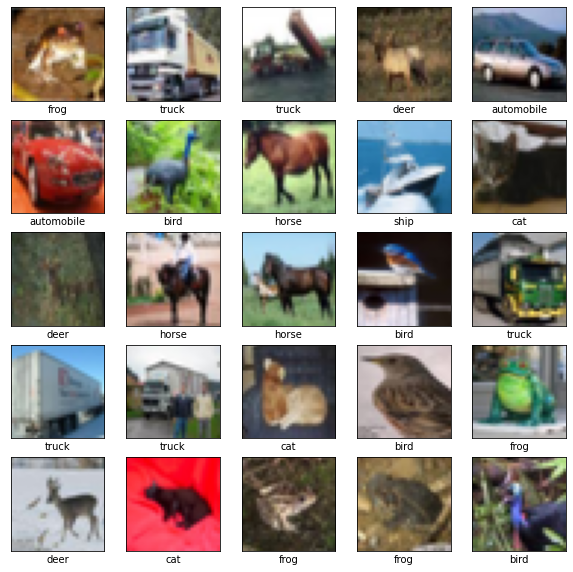

In [46]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Submission

Once you're ready to submit, turn in a copy of this Jupyter notebook and a PDF copy of it. For the PDF, please label the pages of questions 1, 2, and (optionally) 3.

Locally, there should a "Download as" under "File" and PDF should be an option. 

If you're doing this assignment using Colab, Colab does not have this PDF option. I recommend openning this notebook using IPython/Jupyter Notebook locally and doing the instruction above. If you're resistant to this option, there are other options. If you're on a Mac, a hack you can do is to print this page and before you print, save the file as a PDF instead of printing. 

An alternative is to save your Colab notebook as an HTML file and convert that into a PDF (using a third party website like https://html2pdf.com/ or a browser extension like https://chrome.google.com/webstore/detail/web-page-to-pdf-converter/bbfoccanbdeldjaelafmbgonagegdndg). Converting HTMLs into PDFs tends to be easier/more common than ipynb to PDFs. If you need additional help, please feel free to Slack Kevin or Jess for aid!